<h1 style="text-align:center; color:brown">Quantum Entanglement Simulation Using Qiskit</h1>

<h1 style="text-align:left; color:purple">Introduction</h1>

The goal of this project is to implement a quantum circuit that demonstrates quantum entanglement by generating a Bell State. 
We'll build, run, and visualize a quantum circuit using Qiskit, highlighting quantum principles like superposition and entanglement.


<h4>Before we dive into the code, let’s understand what we’re doing:</h4>

- Quantum Bits (Qubits): Unlike classical bits (0 or 1), qubits can exist in a state of superposition, meaning they can be both 0 and 1 simultaneously until measured.

- Superposition: By applying a Hadamard gate (H) to a qubit, we put it into a superposition. This means the qubit will have an equal probability of being 0 or 1 when measured.

- Entanglement: When two qubits are entangled, the state of one qubit becomes directly correlated with the state of the other, regardless of the distance between them. This is achieved using a CNOT (Controlled-NOT) gate, which entangles two qubits based on the state of the control qubit.

- Bell State: A specific example of quantum entanglement, a Bell State is formed when two qubits are in a superposition and exhibit perfect correlation upon measurement. This is the state we aim to generate in our circuit.

<h2 style="text-align:left; color:navy">Installations and imports</h2>

In [11]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

<h2 style="text-align:left; color:navy">Create quantum and classical registers</h2>

We create two quantum registers (q0 and q1), which are the qubits that will hold quantum information, and two classical registers (c0 and c1), which will store the measurement results.

In [12]:
# Two quantum bits
q = QuantumRegister(2, 'q')
# Two classical bits
c = ClassicalRegister(2, 'c')

<h2 style="text-align:left; color:navy">Create a quantum circuit</h2>

In [13]:
circuit = QuantumCircuit(q, c)

<h2 style="text-align:left; color:navy">Apply Hadamard gate to the first qubit (q0)</h2>

The Hadamard gate is applied to the first qubit (q0) to put it into superposition. Before applying the Hadamard gate, q0 is in the state |0⟩ (classical 0). After applying the Hadamard gate, q0 is in an equal superposition of |0⟩ and |1⟩.

In [14]:
#This puts q0 into a superposition state (equal probability of 0 and 1)
circuit.h(q[0])

<h2 style="text-align:left; color:navy">Apply CNOT gate (Control: q0, Target: q1)</h2>

The CNOT gate entangles the second qubit (q1) with the first qubit (q0). If q0 is 0, q1 stays 0; if q0 is 1, q1 flips to 1. This creates a Bell State.

In [15]:
# This entangles q0 and q1. If q0 is 0, q1 remains 0; if q0 is 1, q1 flips to 1.
circuit.cx(q[0], q[1])

<h2 style="text-align:left; color:navy">Measure both qubits</h2>

We measure both qubits, collapsing their superposition and entanglement into a definite state (either |00⟩ or |11⟩).

In [16]:
# We measure q0 and q1 and store the results in the classical register 'c'
circuit.measure(q, c)

<h2 style="text-align:left; color:navy">Visualize the quantum circuit</h2>

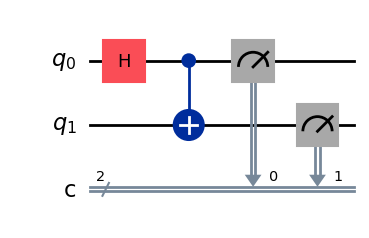

In [17]:
display(circuit.draw('mpl'))

<h2 style="text-align:left; color:navy">Running the Simulation and Analyzing Results</h2>

Now, we run the quantum circuit and visualize the results using a histogram to display the measurement probabilities.

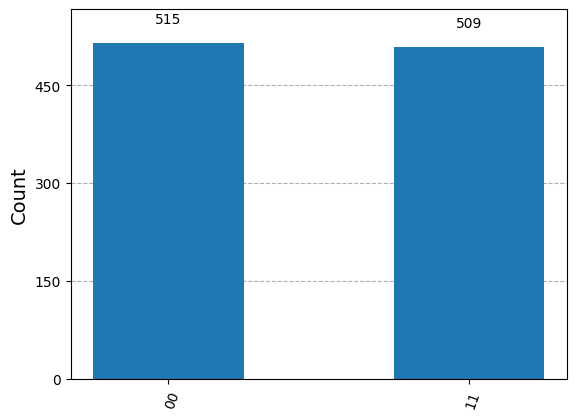

In [18]:
# Use AerSimulator to simulate the circuit
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = circuit

# Execute the circuit on the AerSimulator
result = simulator.run(compiled_circuit).result()

# Get the measurement outcomes
counts = result.get_counts()

# Plot the measurement results
display(plot_histogram(counts))

The results show a histogram with two bars: one for 00 and one for 11 with approximately equal frequencies. These represent the two possible outcomes after measurement. Since the qubits are entangled, they will either both be 0 (00) or both be 1 (11)—no other combinations like 01 or 10 are possible. This confirms the entanglement between the qubits.

<h1 style="text-align:left; color:purple">Conclusion</h1>

In this project, we successfully simulated quantum entanglement by creating a Bell State using Qiskit. The results demonstrated that the qubits are perfectly correlated, confirming the entanglement properties. This project provides a hands-on demonstration of fundamental quantum computing concepts such as superposition and entanglement.

<h2 style="text-align:left; color:green">Optional: Run the circuit on  IBM Quantum hardware</h2>

While this project was primarily simulated using Qiskit’s AerSimulator for efficiency and ease of use, it is also possible to run the circuit on actual IBM Quantum hardware. By connecting to IBM Quantum services, the same circuit can be executed on real quantum processors.

Note: Running on hardware may involve queue times and pending jobs, depending on the quantum processor availability.

<h3 style="text-align:left">This is the implementation :</h3>

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

# Connect to IBM Quantum service using your API token
service = QiskitRuntimeService(channel="ibm_quantum", token=“your”-token)

# Choose the quantum backend
backend = service.backend("ibm_sherbrooke")

# Create quantum and classical register
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Create a quantum circuit
circuit = QuantumCircuit(q, c)

# Apply Hadamard gate to the first qubit (q0)
circuit.h(q[0])

# Apply CNOT gate (Control: q0, Target: q1)
circuit.cx(q[0], q[1])

# Measure both qubits
circuit.measure(q, c)

# Visualize the quantum circuit
circuit.draw('mpl')

# Transpile the circuit for the backend
transpiled_circuit = transpile(circuit, backend=backend)

# Start a session using only the backend
with Session(backend=backend) as session:
    # Initialize the sampler primitive
    sampler = Sampler()
    # Run the circuit using the sampler and get the result
    job = sampler.run([transpiled_circuit])
    result = job.result()
    # Extract and visualize the measurement outcomes
    counts = result.quasi_dists[0].binary_probabilities()
    plot_histogram(counts)


<h3 style="text-align:left; color:pink">Soraya PANAMBALOM</h3>